<a href="https://colab.research.google.com/github/itsmeayushipanday/Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

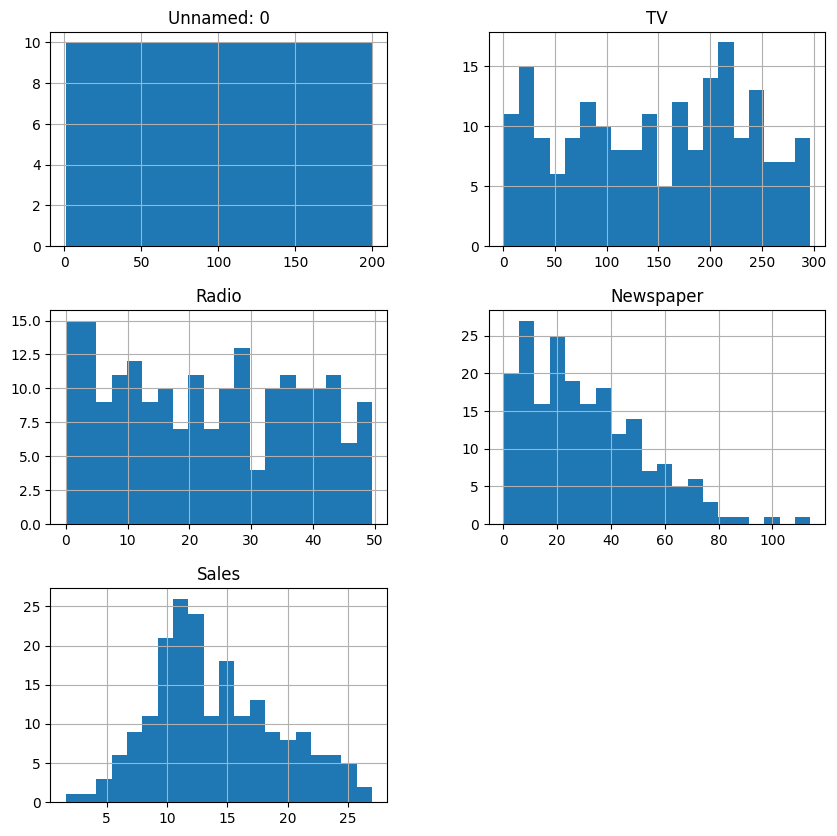

In [ ]:
df.hist(bins=20,figsize=(10,10))
plt.show()

<Axes: xlabel='Sales', ylabel='TV'>

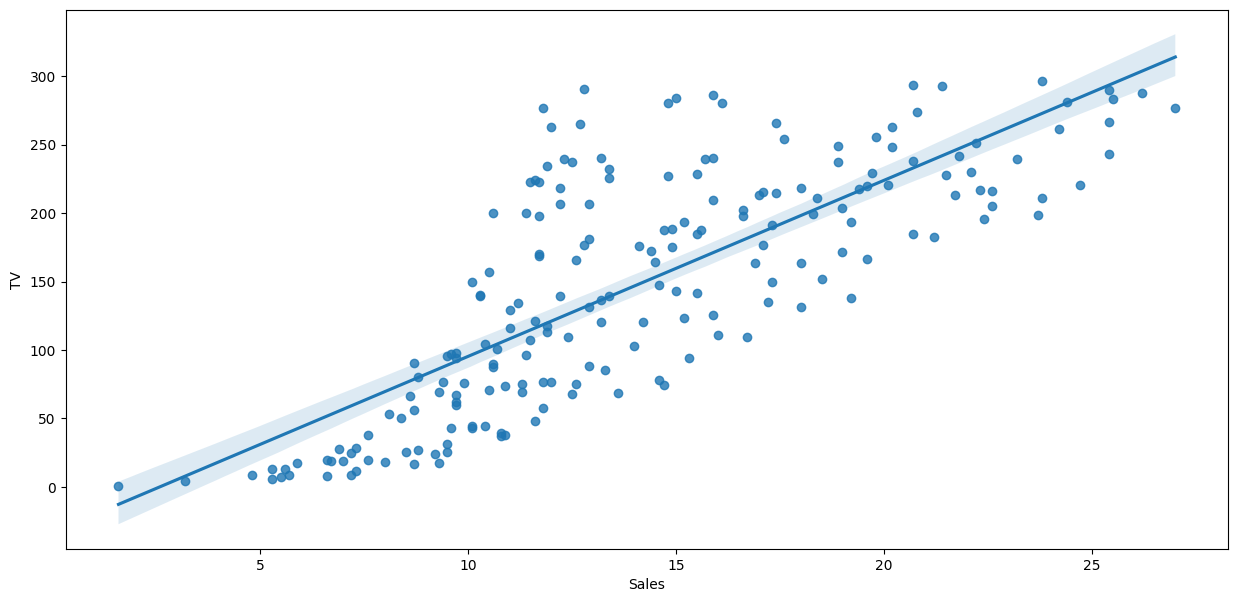

In [ ]:
#to check linear relationship between columns
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'Sales', y = 'TV', scatter = True)

<Axes: xlabel='Sales', ylabel='Radio'>

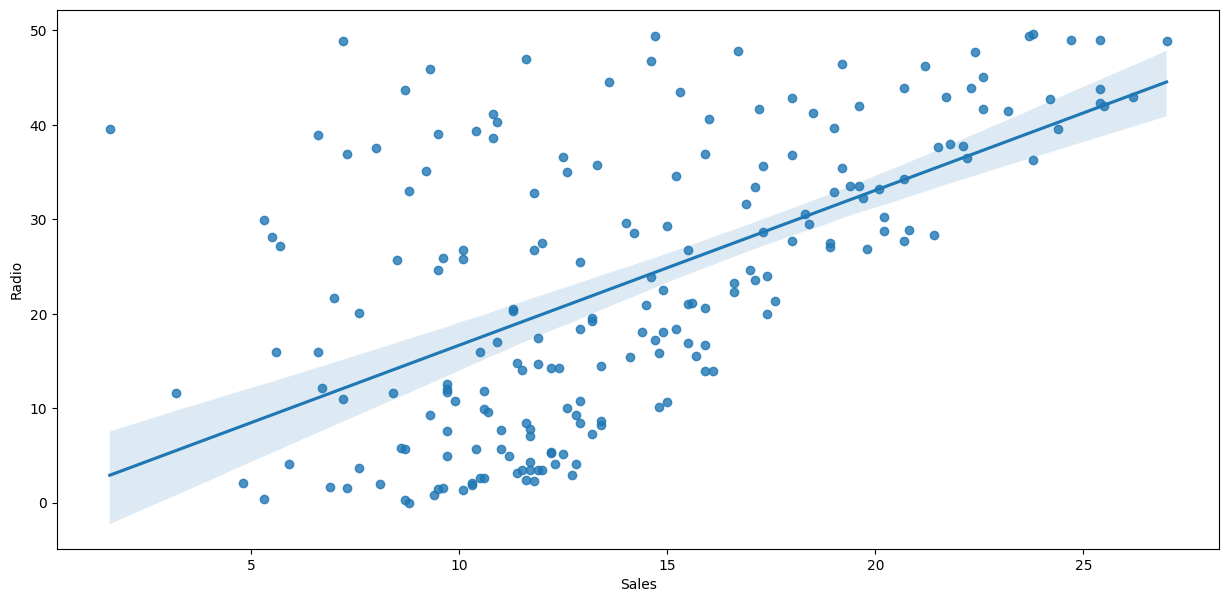

In [ ]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'Sales', y = 'Radio', scatter = True)

<Axes: xlabel='Sales', ylabel='Newspaper'>

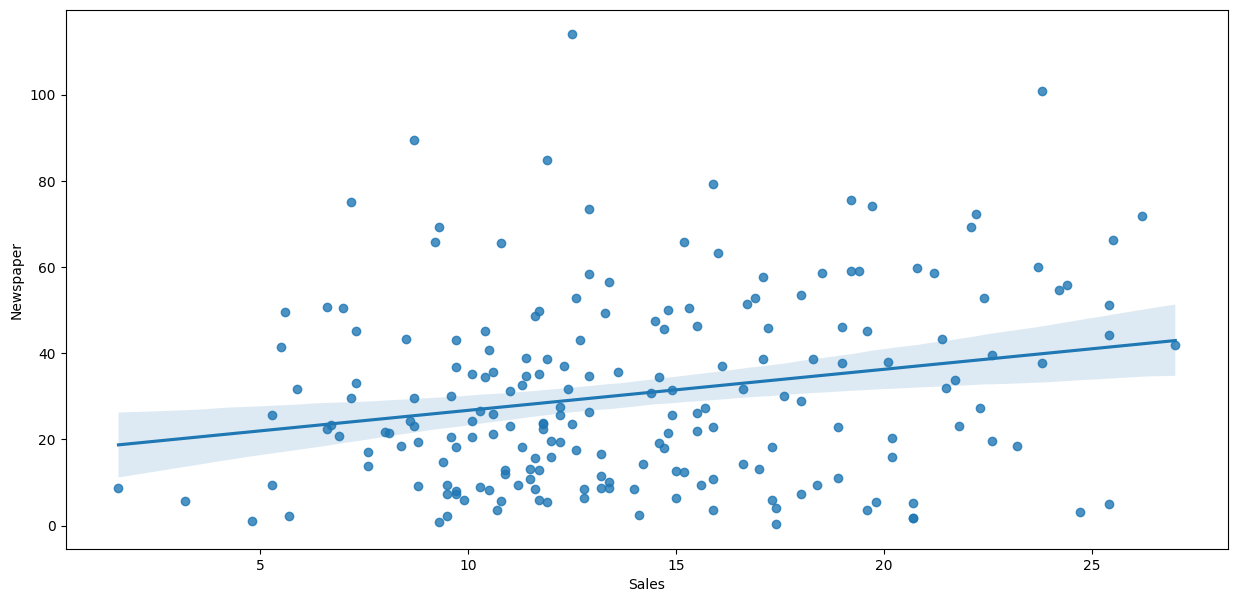

In [ ]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'Sales', y = 'Newspaper', scatter = True)

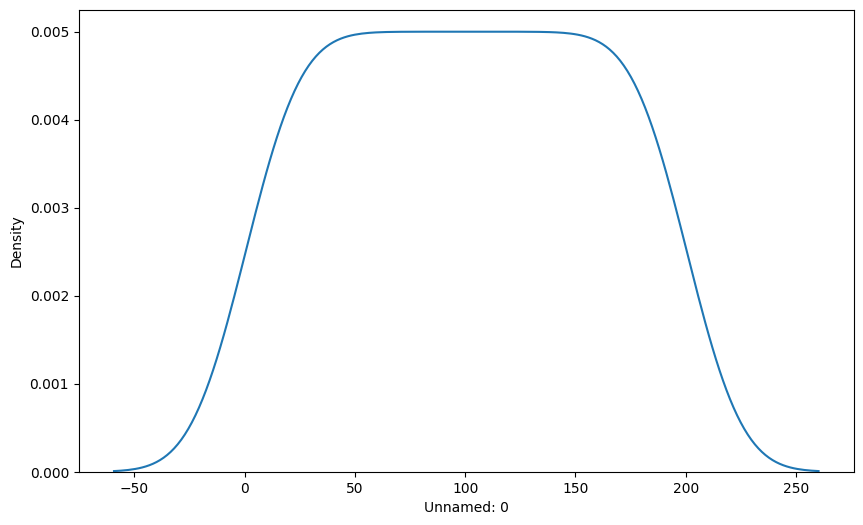

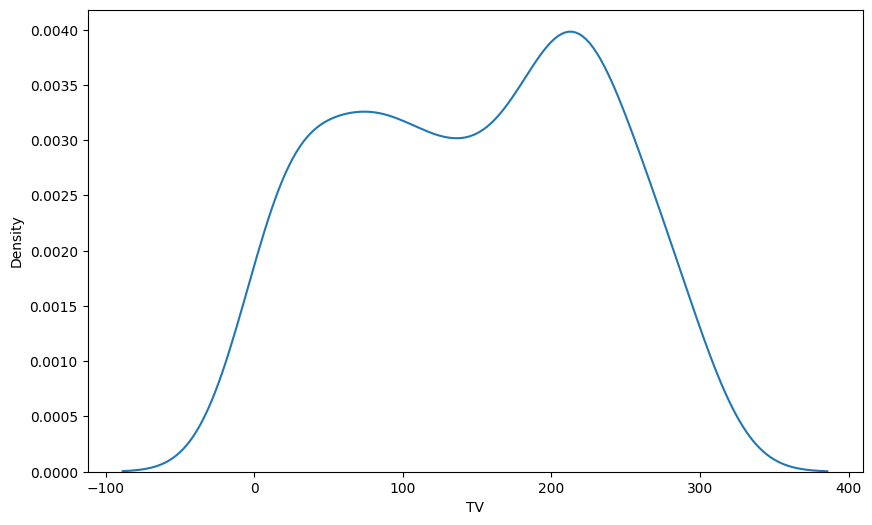

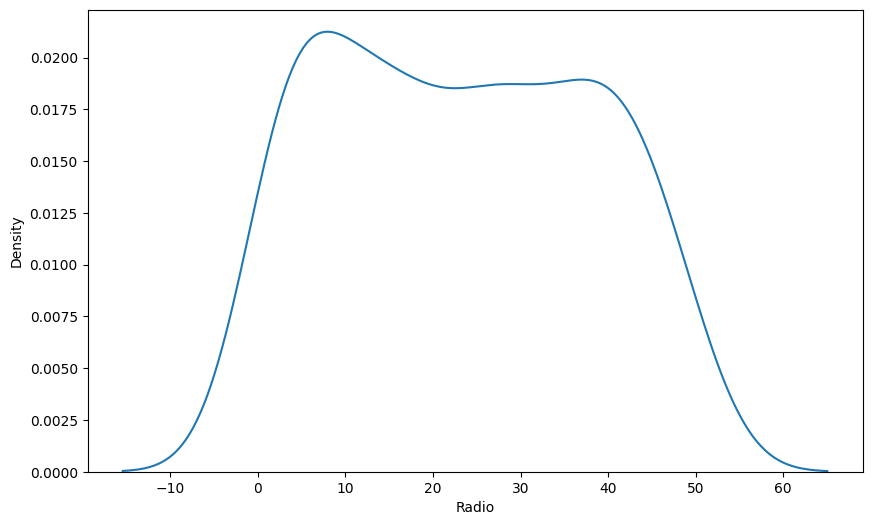

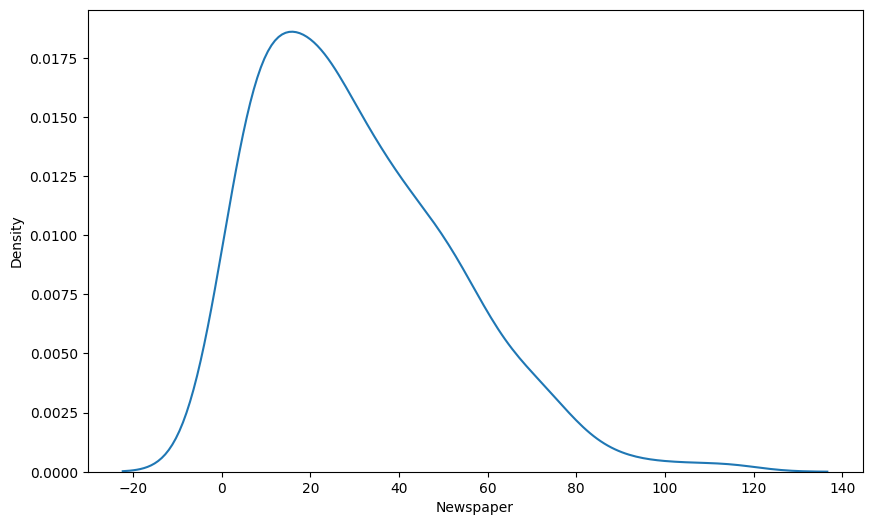

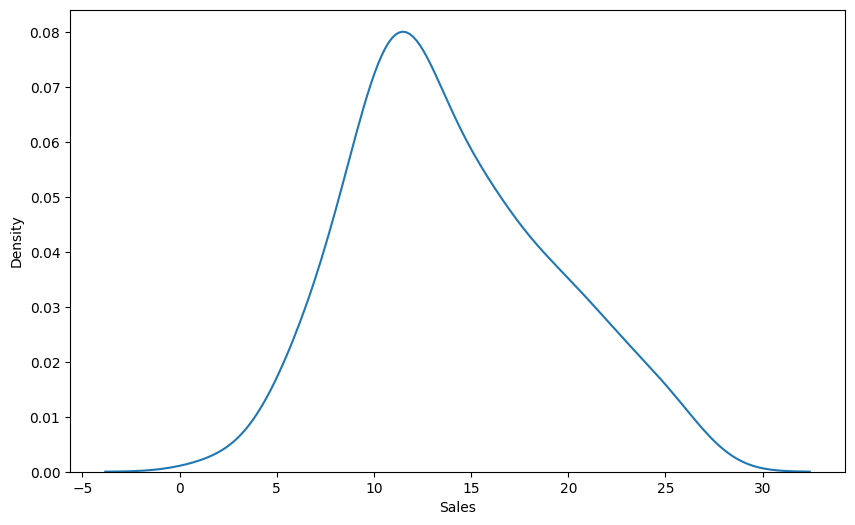

In [ ]:
#kde plot to check distribution of data
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

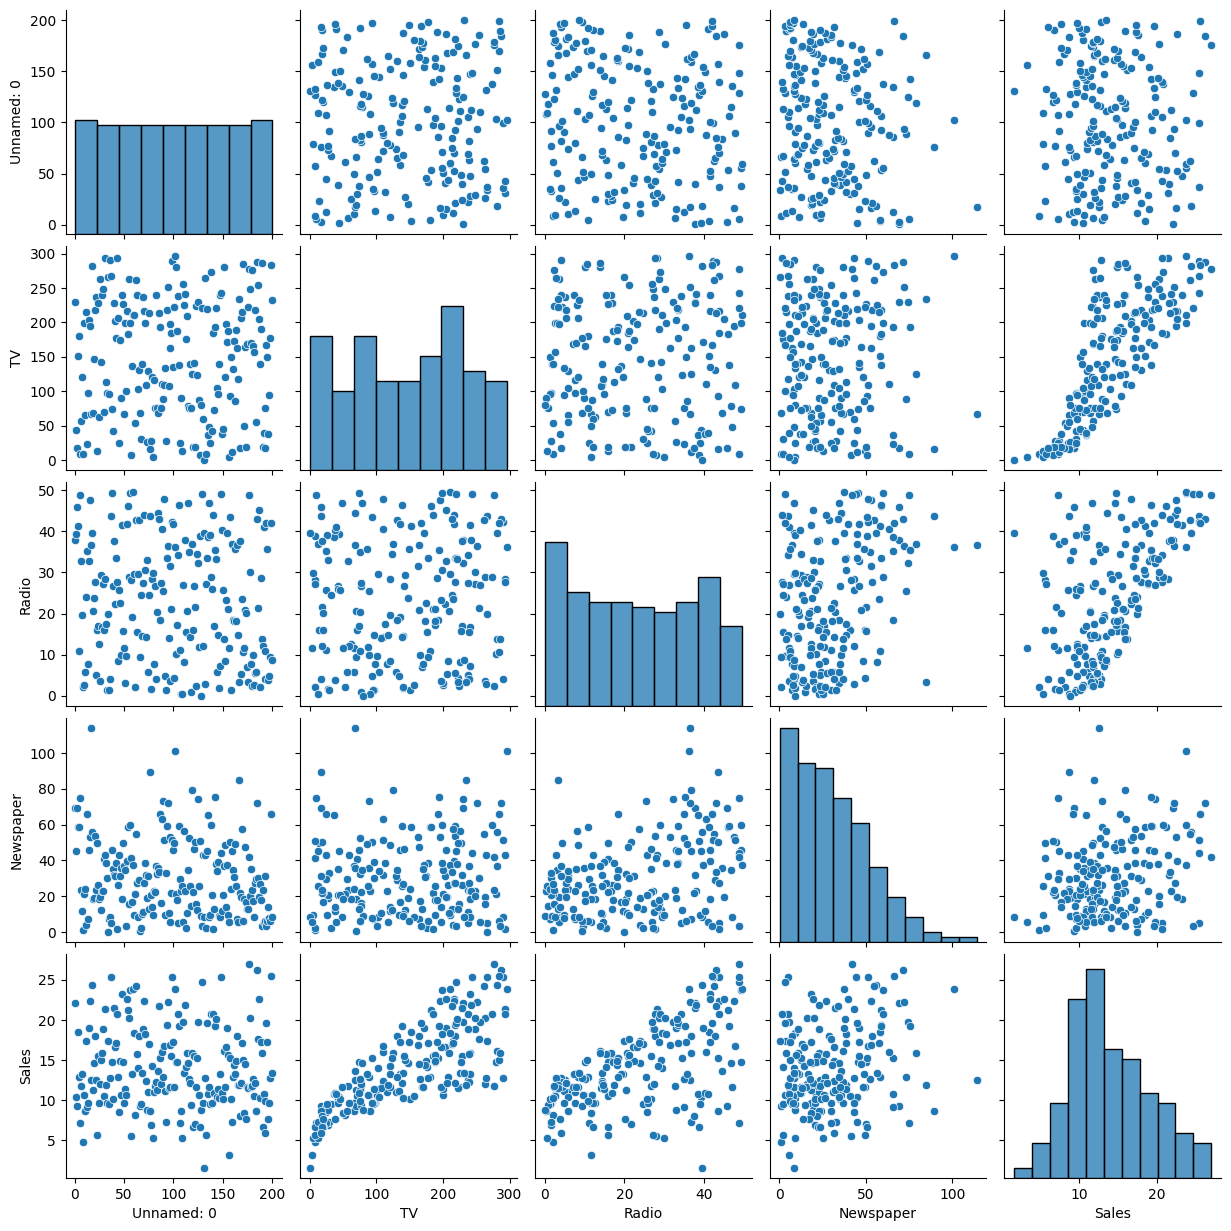

In [ ]:
sns.pairplot(df)

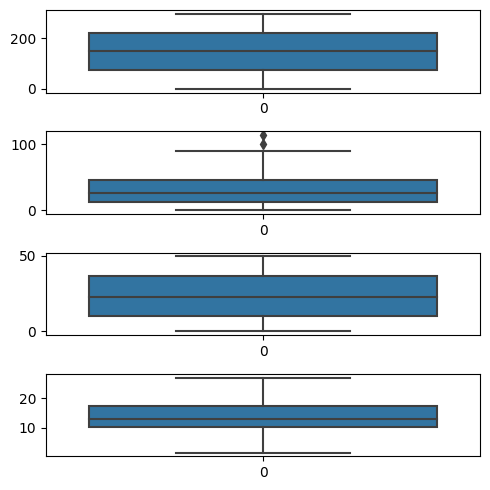

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'],ax=axs[3])
plt.tight_layout()

In [ ]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

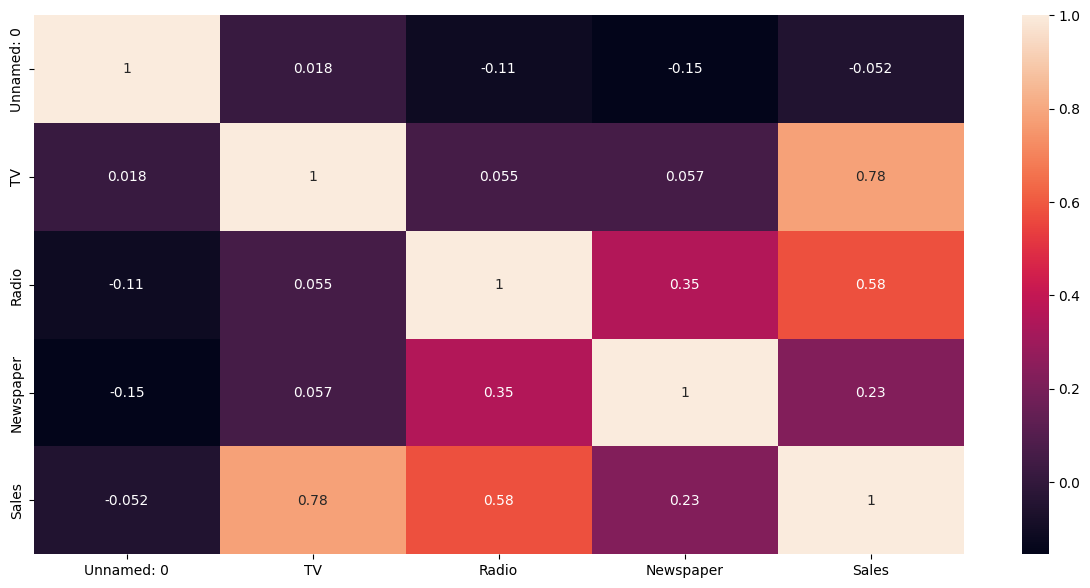

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
Radio         0.094175
Newspaper     0.894720
Sales         0.407571
dtype: float64

In [ ]:
df['Newspaper']=np.sqrt(df['Newspaper'])

In [ ]:
#dividing data in feauture and vector
x=df.drop(['Sales'],axis=1)
y=df['Sales']
from sklearn.preprocessing import power_transform
X=power_transform(x,method='yeo-johnson')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
Radio         0.094175
Newspaper     0.062388
Sales         0.407571
dtype: float64

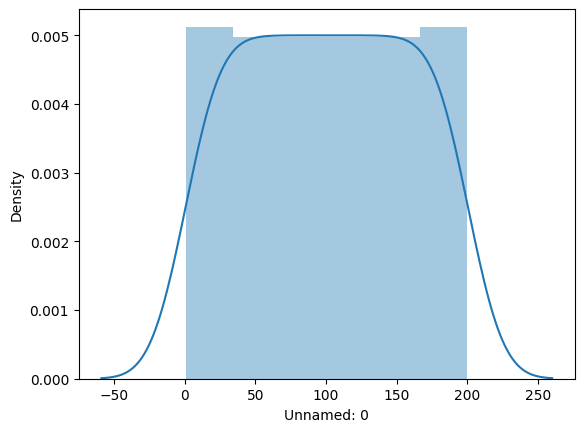

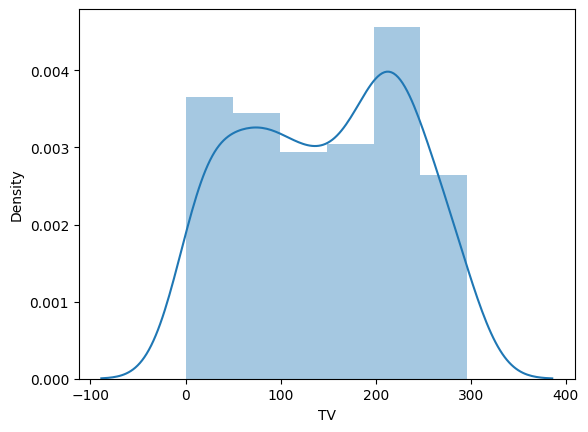

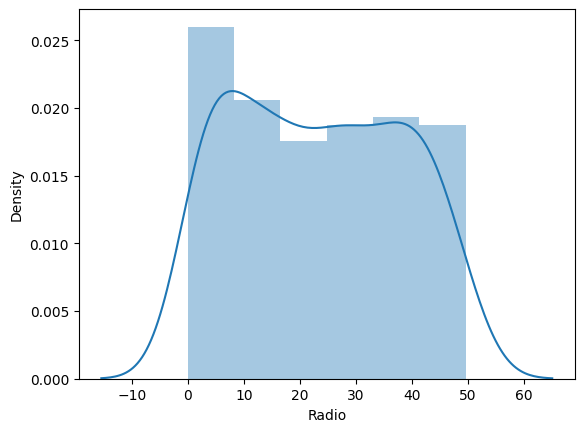

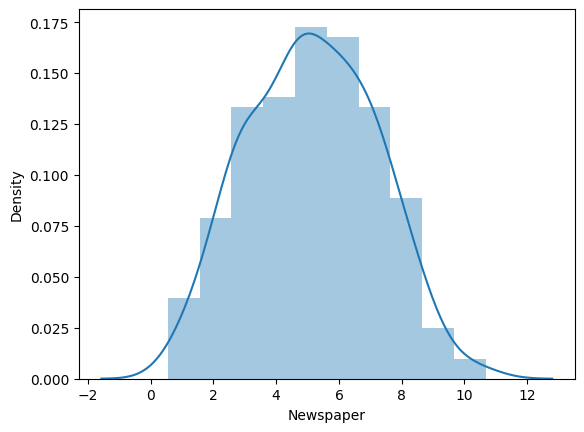

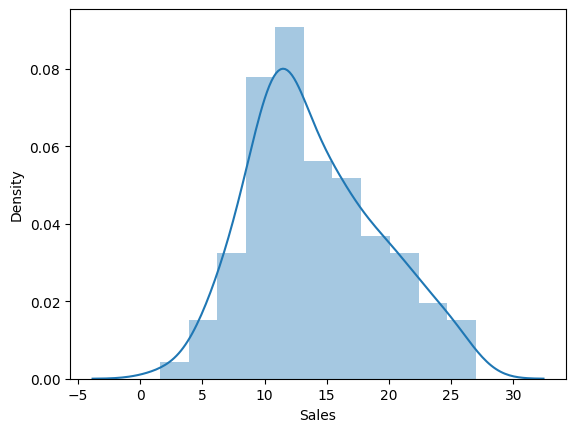

In [ ]:
for i, col in enumerate(df):
    plt.figure(i)
    sns.distplot(df[col])

REMOVING OUTLINERS

In [ ]:
df.columns

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#import libray
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(200, 4)

In [ ]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [ ]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(200, 4)


In [ ]:
#percentage data loss
loss_percent=(200-198)/200*100
print(loss_percent)

1.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 4)
(160,)
(40, 4)
(40,)


In [ ]:
#LinearRegression
lm=LinearRegression(fit_intercept=True)
lm.fit(x_train,y_train)
print('model coeffient :',lm.coef_)
print('model intercept :',lm.intercept_)
lm.score(x_train,y_train)
pred=lm.predict(x_test)

model coeffient : [-0.00163082  0.04533634  0.18867411  0.02122489]
model intercept : 2.992310841852934


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9279956795746787


In [ ]:
ln_cv=cross_val_score(lm,x,y, cv = 10).mean()
ln_cv

0.8827025756839658

Text(0, 0.5, 'Predicted Y')

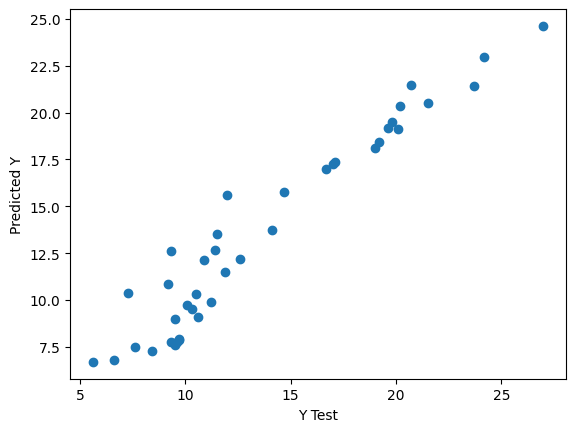

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')